<a href="https://colab.research.google.com/github/hooroobaby/NCUECTech/blob/main/ECT_HW6_107403037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第一部分：Predicting Performance
## 分類任務：根據一個人的相關資訊判斷此人 10 年內是否有罹患心臟病的風險(TenYearCHD)

# 1.

In [ ]:
import pandas as pd
df = pd.read_csv('framingham_train.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.184211,0.333333,1,0.428571,0,0,0,0,0.176591,0.191489,0.402116,0.190257,0.323232,0.090395,0
1,1,0.736842,0.000000,0,0.000000,0,0,0,0,0.262834,0.170213,0.328042,0.221037,0.161616,0.107345,0
2,0,0.157895,0.666667,1,0.500000,0,0,0,0,0.104723,0.125296,0.296296,0.201406,0.242424,0.121469,0
3,0,0.868421,0.333333,0,0.000000,0,0,1,0,0.293634,0.309693,0.507937,0.344401,0.464646,0.112994,1
4,0,0.947368,0.666667,1,0.285714,0,0,1,0,0.297741,0.352246,0.486772,0.390208,0.363636,0.124294,1


In [ ]:
X = df[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
y = df[['TenYearCHD']]

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [ ]:
print("訓練資料Accuracy：", model.score(X,y))

訓練資料Accuracy： 0.8522975929978118


# 2.

In [ ]:
sp1 = pd.read_csv('test_sample_1.csv')
sp4 = pd.read_csv('test_sample_4.csv')
sp5 = pd.read_csv('test_sample_5.csv')

In [ ]:
z = pd.DataFrame({
    "Pr[X>=z]":['0.1%','0.5%','1%','5%','10%','20%','40%'],
    "z":[3.09,2.58,2.33,1.65,1.28,0.84,0.25]
})
# z.set_index("Pr[X>=z]",inplace = True)
z.columns = ['Pr[X>=z]','z']
z.groupby("Pr[X>=z]")
z

,Pr[X>=z],z
0,0.1%,3.09
1,0.5%,2.58
2,1%,2.33
3,5%,1.65
4,10%,1.28
5,20%,0.84
6,40%,0.25


In [ ]:
c80 = int(((100-80)/2))
c80 = str(c80)+"%"
# z80 = z.loc[c80].values
fil = z[z["Pr[X>=z]"]==c80]
z80 = fil['z'].values[0]

c90 = int(((100-90)/2))
c90 = str(c90)+"%"
# z90 = z.loc[c90].values
# z90
fil = z[z["Pr[X>=z]"]==c90]
z90 = fil['z'].values[0]

c99 = ((100-99)/2)
c99 = str(c99)+"%"
fil = z[z["Pr[X>=z]"]==c99]
z99 = fil['z'].values[0]
# type(c80)

In [ ]:
X1 = sp1[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
y1 = sp1[['TenYearCHD']]

### test_sample_1.csv

In [ ]:
f = model.score(X1, y1)
N1 = len(sp1.index)

In [ ]:
import math
sqrt1 = math.sqrt((f/N1)-(f*f/N1)+((z80*z80)/(4*N1*N1)))

l801 = (f+((z80*z80)/(2*N1))-z80*sqrt1)/(1+(z80*z80)/N1)
u801 = (f+((z80*z80)/(2*N1))+z80*sqrt1)/(1+(z80*z80)/N1)

In [ ]:
sqrt1 = math.sqrt((f/N1)-(f*f/N1)+((z90*z90)/(4*N1*N1)))

l901 = (f+((z90*z90)/(2*N1))-z90*sqrt1)/(1+(z90*z90)/N1)
u901 = (f+((z90*z90)/(2*N1))+z90*sqrt1)/(1+(z90*z90)/N1)

In [ ]:
sqrt1 = math.sqrt((f/N1)-(f*f/N1)+((z99*z99)/(4*N1*N1)))

l991 = (f+((z99*z99)/(2*N1))-z99*sqrt1)/(1+(z99*z99)/N1)
u991 = (f+((z99*z99)/(2*N1))+z99*sqrt1)/(1+(z99*z99)/N1)

### test_sample_4.csv

In [ ]:
X4 = sp4[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
y4 = sp4[['TenYearCHD']]
f = model.score(X4, y4)
N4 = len(sp4.index)

In [ ]:
sqrt1 = math.sqrt((f/N4)-(f*f/N4)+((z80*z80)/(4*N4*N4)))
l804 = (f+((z80*z80)/(2*N4))-z80*sqrt1)/(1+(z80*z80)/N4)
u804 = (f+((z80*z80)/(2*N4))+z80*sqrt1)/(1+(z80*z80)/N4)

sqrt1 = math.sqrt((f/N4)-(f*f/N4)+((z90*z90)/(4*N4*N4)))
l904 = (f+((z90*z90)/(2*N4))-z90*sqrt1)/(1+(z90*z90)/N4)
u904 = (f+((z90*z90)/(2*N4))+z90*sqrt1)/(1+(z90*z90)/N4)

sqrt1 = math.sqrt((f/N4)-(f*f/N4)+((z99*z99)/(4*N4*N4)))
l994 = (f+((z99*z99)/(2*N4))-z99*sqrt1)/(1+(z99*z99)/N4)
u994 = (f+((z99*z99)/(2*N4))+z99*sqrt1)/(1+(z99*z99)/N4)

### test_sample_5.csv

In [ ]:
X5 = sp5[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
y5 = sp5[['TenYearCHD']]
f = model.score(X5, y5)
N5 = len(sp5.index)

In [ ]:
sqrt1 = math.sqrt((f/N5)-(f*f/N5)+((z80*z80)/(4*N5*N5)))
l805 = (f+((z80*z80)/(2*N5))-z80*sqrt1)/(1+(z80*z80)/N5)
u805 = (f+((z80*z80)/(2*N5))+z80*sqrt1)/(1+(z80*z80)/N5)

sqrt1 = math.sqrt((f/N5)-(f*f/N5)+((z90*z90)/(4*N5*N5)))
l905 = (f+((z90*z90)/(2*N5))-z90*sqrt1)/(1+(z90*z90)/N5)
u905 = (f+((z90*z90)/(2*N5))+z90*sqrt1)/(1+(z90*z90)/N5)

sqrt1 = math.sqrt((f/N5)-(f*f/N5)+((z99*z99)/(4*N5*N5)))
l995 = (f+((z99*z99)/(2*N5))-z99*sqrt1)/(1+(z99*z99)/N5)
u995 = (f+((z99*z99)/(2*N5))+z99*sqrt1)/(1+(z99*z99)/N5)
u995

0.8787394711298374

In [ ]:
import numpy as np
tuples = [
   (N1,"lower"), (N1,"upper"),
   (N4,"lower"), (N4,"upper"),
   (N5,"lower"), (N5,"upper")
]
index = pd.MultiIndex.from_tuples(tuples)
values = [[l801, l901, l991],
          [u801, u901, u991],
          [l804, l904, l994],
          [u804, u904, u994],
          [l805, l905, l995],
          [u805, u905, u995]]
df = pd.DataFrame(values, columns=['80%', '90%', '99%'], index=index)
df

80%       90%       99%
100  lower  0.889941  0.875531  0.834004
     upper  0.956196  0.961676  0.972323
1000 lower  0.842246  0.837764  0.826075
     upper  0.870586  0.874298  0.883204
1800 lower  0.848059  0.844807  0.836394
     upper  0.869066  0.871887  0.878739

# 3.

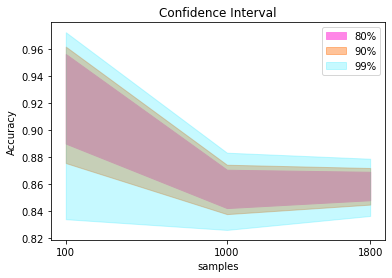

In [ ]:
import matplotlib.pyplot as plt
x = [N1,N4,N5]
y80 = [l801,l804,l805]
y800 = [u801,u804,u805]
l80 = plt.fill_between(x,y80,y800, alpha=1.0, color='#ff87e7')

y90 = [l901,l904,l905]
y900 = [u901,u904,u905]
l90 = plt.fill_between(x,y90,y900, alpha=0.4, color='#ff6900')

y99 = [l991,l994,l995]
y990 = [u991,u994,u995]
l99 = plt.fill_between(x,y99,y990, alpha=0.3, color='#43ecff')

plt.legend([l80,l90,l99],["80%","90%","99%"])
plt.title("Confidence Interval")
plt.ylabel("Accuracy")
plt.xlabel("samples")
plt.xticks([N1,N4,N5])
plt.show()

# 4.

## (a)在同一信心水準下， 3 個測試資料集的信賴區間有何不同？
### Answer:當樣本數越來越大，信賴區間的寬度也越來越小，表示準確度的精準值越來越好

## (b) 不同信心水準下的信賴區間有何不同？
### Answer:在樣本數相同的情況下，信賴水準c越大，信賴區間也越大

# 第二部分：Model Comparison

In [ ]:
data = pd.read_csv('BreastCancer.csv',index_col='id')
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


## 資料前處理

In [ ]:
# 丟棄Unnamed
data = data.drop(['Unnamed: 32'],axis=1)

In [ ]:
data.groupby(['diagnosis']).size()
# 判斷diagnosis為目標
import copy
copy = copy.deepcopy(data['diagnosis'])

In [ ]:
data = data.drop(['diagnosis'],axis=1)

In [ ]:
data['diagnosis'] = copy

In [ ]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


## Naive Bayes

In [ ]:
X = data[data.columns[:-1]]
y = data[['diagnosis']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=100, stratify=y)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
modelnb = BernoulliNB(binarize=3)
modelnb.fit(X_train,y_train)
y_pred = modelnb.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.78      0.86      0.82        72
           M       0.71      0.60      0.65        42

    accuracy                           0.76       114
   macro avg       0.75      0.73      0.74       114
weighted avg       0.76      0.76      0.76       114



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62, 10],
       [17, 25]], dtype=int64)

In [ ]:
print("NB model的accuracy",modelnb.score(X_test, y_test))

NB model的accuracy 0.7631578947368421


In [ ]:
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]
print("NB Accuracy：", (TP+TN)/(TP+TN+FP+FN))
print("NB Precision(B)：", TP/(TP+FP))
print("NB Recall(B)：", TP/(TP+FN))
print("NB Precision(M)：", TN/(FN+TN))
print("NB Recall(M)：", TN/(TN+FP))

NB Accuracy： 0.7631578947368421
NB Precision(B)： 0.7848101265822784
NB Recall(B)： 0.8611111111111112
NB Precision(M)： 0.7142857142857143
NB Recall(M)： 0.5952380952380952


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelnb,X_train,y_train,cv=10,scoring="accuracy")
print(scores)
print("CV的準確率：",scores.mean())

[0.76086957 0.82608696 0.76086957 0.80434783 0.80434783 0.77777778
 0.86666667 0.82222222 0.86666667 0.86666667]
CV的準確率： 0.8156521739130435


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

## Decision Tree

In [ ]:
X = data[data.columns[:-1]]
y = data[['diagnosis']]
from sklearn import tree
modeltree = tree.DecisionTreeClassifier()
modeltree.fit(X_train,y_train)
y_pred = modeltree.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.96      0.94      0.95        72
           M       0.91      0.93      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
print("tree model的accuracy",modeltree.score(X_test, y_test))

tree model的accuracy 0.9385964912280702


In [ ]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]
print("tree Accuracy：", (TP+TN)/(TP+TN+FP+FN))
print("tree Precision(B)：", TP/(TP+FP))
print("tree Recall(B)：", TP/(TP+FN))
print("tree Precision(M)：", TN/(FN+TN))
print("tree Recall(M)：", TN/(TN+FP))
cm

tree Accuracy： 0.9385964912280702
tree Precision(B)： 0.9577464788732394
tree Recall(B)： 0.9444444444444444
tree Precision(M)： 0.9069767441860465
tree Recall(M)： 0.9285714285714286


array([[68,  4],
       [ 3, 39]], dtype=int64)

In [ ]:
scores = cross_val_score(modeltree,X_train,y_train,cv=10,scoring="accuracy")
print(scores)
print("CV的準確率：",scores.mean())

[0.97826087 0.97826087 0.93478261 0.89130435 0.95652174 0.91111111
 0.93333333 0.91111111 0.77777778 0.97777778]
CV的準確率： 0.925024154589372


## SVM

In [ ]:
X = data[data.columns[:-1]]
y = data[['diagnosis']]
from sklearn import svm
modelsvm=svm.SVC(kernel='rbf',C=1,gamma='auto')
modelsvm.fit(X_train,y_train)
y_pred1 = modelsvm.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           B       0.63      1.00      0.77        72
           M       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("SVM model的accuracy：",modelsvm.score(X_test, y_test))

SVM model的accuracy： 0.631578947368421


In [ ]:
cm = confusion_matrix(y_test, y_pred1)
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]
print("svm Accuracy：", (TP+TN)/(TP+TN+FP+FN))
print("svm Precision(B)：", TP/(TP+FP))
print("svm Recall(B)：", TP/(TP+FN))
print("svm Recall(M)：", TN/(TN+FP))
cm

svm Accuracy： 0.631578947368421
svm Precision(B)： 0.631578947368421
svm Recall(B)： 1.0
svm Recall(M)： 0.0


array([[72,  0],
       [42,  0]], dtype=int64)

In [ ]:
scores = cross_val_score(modelsvm,X_train,y_train,cv=10,scoring="accuracy")
print(scores)
print("CV的準確率：",scores.mean())

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

[0.63043478 0.63043478 0.63043478 0.63043478 0.63043478 0.62222222
 0.62222222 0.62222222 0.62222222 0.62222222]
CV的準確率： 0.6263285024154589
